In [28]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [29]:
df_DA_US = df[(df['job_country'] == 'United States') & (df['job_title'] =='Data Analyst')].copy()
df_DA_US = df_DA_US.dropna(subset=['salary_year_avg'])



In [30]:
df_DA_US = df_DA_US.explode('job_skills')
df_DA_US = df_DA_US[['salary_year_avg', 'job_skills']]
df_DA_US

,salary_year_avg,job_skills
1681,111175.0,sql
1681,111175.0,tableau
1681,111175.0,power bi
1681,111175.0,excel
3237,120000.0,sql
...,...,...
781263,75000.0,sql
781263,75000.0,python
781263,75000.0,scala
781263,75000.0,databricks


In [36]:
df_DA_US_group = df_DA_US.groupby('job_skills')['salary_year_avg'].agg(['count', 'median'])
df_DA_US_top_pay = df_DA_US_group.sort_values(by='median', ascending=False).head(10)
df_DA_skills = df_DA_US_group.sort_values(by='count', ascending=False).head(10)


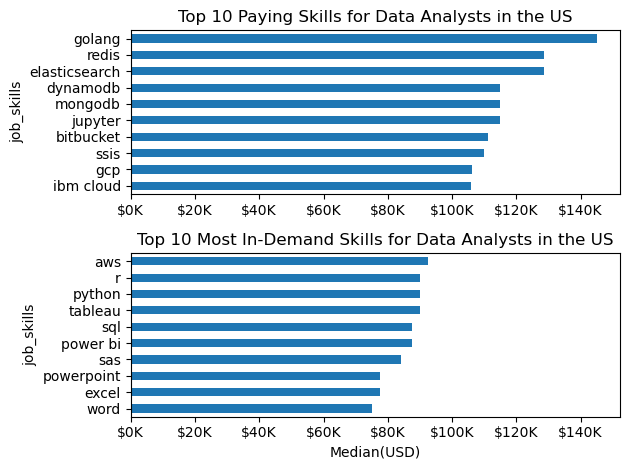

In [55]:
fig, ax = plt.subplots(2,1)
df_DA_US_top_pay.sort_values(by='median', ascending=True).plot(kind = 'barh', y='median', ax=ax[0], legend=False, title='Top 10 Paying Skills for Data Analysts in the US')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))
df_DA_skills.sort_values(by='median', ascending=True).plot(kind = 'barh', y='median', ax=ax[1], legend=False,xlabel= 'Median(USD)', title='Top 10 Most In-Demand Skills for Data Analysts in the US')
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))
ax[1].set_xlim(ax[0].get_xlim())
plt.tight_layout()
plt.show()